# Lab 6 Report
Qinchen Lin

In [165]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
#import pickle

# Problem 1

In [263]:
# Get the threshhold for 5 sigma

p_low = stats.norm.cdf(-5)
p_up = stats.norm.cdf(5)
lowerthreshold = stats.poisson.ppf(p_low, 100)
upperthreshold = stats.poisson.ppf(p_up, 100)
print('The upper threshhold for 5 sigma is', upperthreshold)
print('The lower threshhold for 5 sigma is', lowerthreshold)

The upper threshhold for 5 sigma is 154.0
The lower threshhold for 5 sigma is 54.0


# Problem 2

In [12]:
# Get the threshhold for 8 sigma
p_strong = stats.norm.cdf(8)
value_strong = stats.poisson.ppf(p_strong, 100)
p_weak = stats.norm.cdf(-8)
value_weak = stats.poisson.ppf(p_weak, 100)
print(value)
print(value_weak)

190.0
31.0


<Figure size 432x288 with 0 Axes>

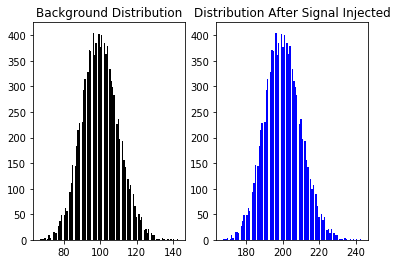

In [242]:
# Here I chose 200 to be my signal
plt.subplots_adjust(hspace = 1, wspace = 1)
fig, axs = plt.subplots(1, 2)
background = stats.poisson.rvs(100, size = 10000)
data = background + 100
axs[0].hist(background, 100, color = 'k')
axs[0].set_title('Background Distribution')
axs[1].hist(data, 100, color = 'b')
axs[1].set_title('Distribution After Signal Injected')
plt.show()

a)
The histogram is still bell shape which is the same as the background distribution and it's also a poisson distribution. The only different is the shift along x-axis. This tells us that in this specific case, the injected signal distribution will not change as the signal strength changes. It can also tell that the distribution is a slightly sskewed to the right.

b)
As we can tell from the Problem 1, the 5 sigma upper threshhold is 154 (54 away from the mean value) while the lower threshhold is 54 (46 away from the mean value). So the background distribution is not symetric, it's right skewed. It can also be confirmed by that fact that poisson distribution with small mu is not symetric. In this problem, the injected signal has the same distribution as background signal (shifted), so it's slightly right skewed as well. The observed signal (in this case 200) is more likely (not much) to be stronger than injected signal. 

# Problem 3

I'm simulating the injected signal by sampling it from the background distribution (for a set of signal strength). This will latter be used to determine the uncertainty of the observed signal. 

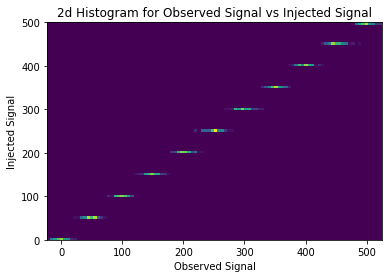

In [264]:
# a
# Here I chose a set of signal with size 11, ranging from 0 to 500 (large sigma value)

signal = np.linspace(0, 500, 11)
injected = []
observed = []
for i in signal:
    injected = np.concatenate((injected, np.zeros(100) + i))
for j in  signal:
    background_measurement = stats.poisson.rvs(100, size = 100)
    observed = np.concatenate((observed, background_measurement + j - 100))
plt.hist2d(observed, injected, 100)
plt.xlabel("Observed Signal")
plt.ylabel("Injected Signal")
plt.title("2d Histogram for Observed Signal vs Injected Signal")
plt.show()

b) Not the same

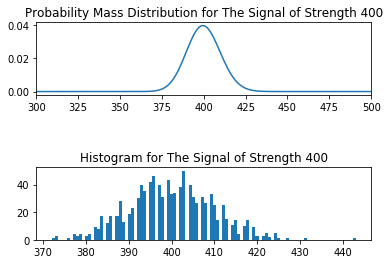

In [245]:
# c
# I chose 400 to be my signal

signal400 = 300 + stats.poisson.rvs(100, size = 1000)
x = np.linspace(0,400,401)
signal_400 = stats.poisson.pmf(x,100)

plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.plot(300 + x, signal_400)
plt.xlim(300, 500)
plt.title('Probability Mass Distribution for The Signal of Strength 400')

plt.subplot(2,1,2)
plt.hist(signal400, 100)
plt.title('Histogram for The Signal of Strength 400')
plt.show()

This histogram gives us a sense of the probability distribution of uncertainty we might get from the observed signal. To be specific, we can derive the uncertainty by using some specific sigma value. 

In [265]:
# d

p_low = stats.norm.cdf(-1)
p_up = stats.norm.cdf(1)
lowerthreshold_400 = stats.poisson.ppf(p_low, 100) + 300
upperthreshold_400 = stats.poisson.ppf(p_up, 100) + 300
print("The true signal strength with 1 sigma uncertainty is from", lowerthreshold_400, "to", upperthreshold_400)

The true signal strength with 1 sigma uncertainty is from 390.0 to 410.0


e) As we can see fromt he result above, for one sigma uncertainty, the range is symetric (400 plus and minus 10). This result actually surprised me, because the poisson distribution with small mu value won't be symetric. Clearly 100 is not large enough to make the distribution perfectly symetric, and it was confirmed in problem 2. So my guess is that either it is a coincident or the unsymetric part of the distribution mostly appear to be out of 1 sigma range. I prefer the second assumption. And it kind of make sense from the histogram in part 3 that the tails part are less symetric. According to the result, I can't say it's biased for 1 sigma uncertainty, but I think more prove is needed to say it's not bias.  



# Problem 4

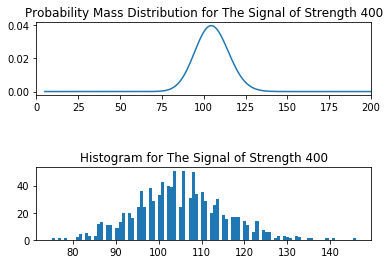

In [258]:
# Here I picked the signal with a strength 105
# a

signal105 = 5 + stats.poisson.rvs(100, size = 1000)
x = np.linspace(0,200,201)
signal_105 = stats.poisson.pmf(x,100)

plt.subplots_adjust(hspace = 1, wspace = 1)
plt.subplot(2,1,1)
plt.plot(5 + x, signal_105)
plt.xlim(0, 200)
plt.title('Probability Mass Distribution for The Signal of Strength 400')

plt.subplot(2,1,2)
plt.hist(signal105, 100)
plt.title('Histogram for The Signal of Strength 400')
plt.show()


b) From the histogram above, we can see that some value extends to 0, which means that it's possible to get a signal of zero if our observed signal were 105

In [266]:
upperthreshold_105 = stats.poisson.ppf(0.95, 100) + 5
print('The upper treshold for 95% confidence is', upperthreshold_105)

The upper treshold for 95% confidence is 122.0
